In [3]:
!pip install greatpy
!pip install git+https://github.com/theislab/greatpy.git@main

  Using cached greatpy-0.0.1-py3-none-any.whl (30 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 18.3 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for dask from https://files.pythonhosted.org/packages/d1/41/85c77fd91994835797f480d28a757ce5bfce7bfb07ea56cc81fb002a77f8/dask-2023.10.0-py3-none-any.whl.metadata
  Using cached gprofiler-1.2.2-py2.py3-none-any.whl (3.1 kB)
  Obtaining dependency information for cloudpickle>=1.5.0 from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec>=2021.09.0 from https://files.pythonhosted.org/packages/fe/d3/e1aa96437d944fbb9cc95d0316e25583886e9cd9e6adc07baad943524eda/fsspec-2023.9.2-

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import greatpy as great
import pandas as pd
from math import inf
from numpy import log,nan, int64,cov,corrcoef
from scipy.stats import pearsonr
from seaborn import scatterplot as sp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, rc, rcParams
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**To use, first generate .bed files for the GUIDE latent factors using the other notebook.**

In [6]:
guide_test = "./guide_beds/PC15.bed"
regdom = "./regulatory_domain_hg19.bed"

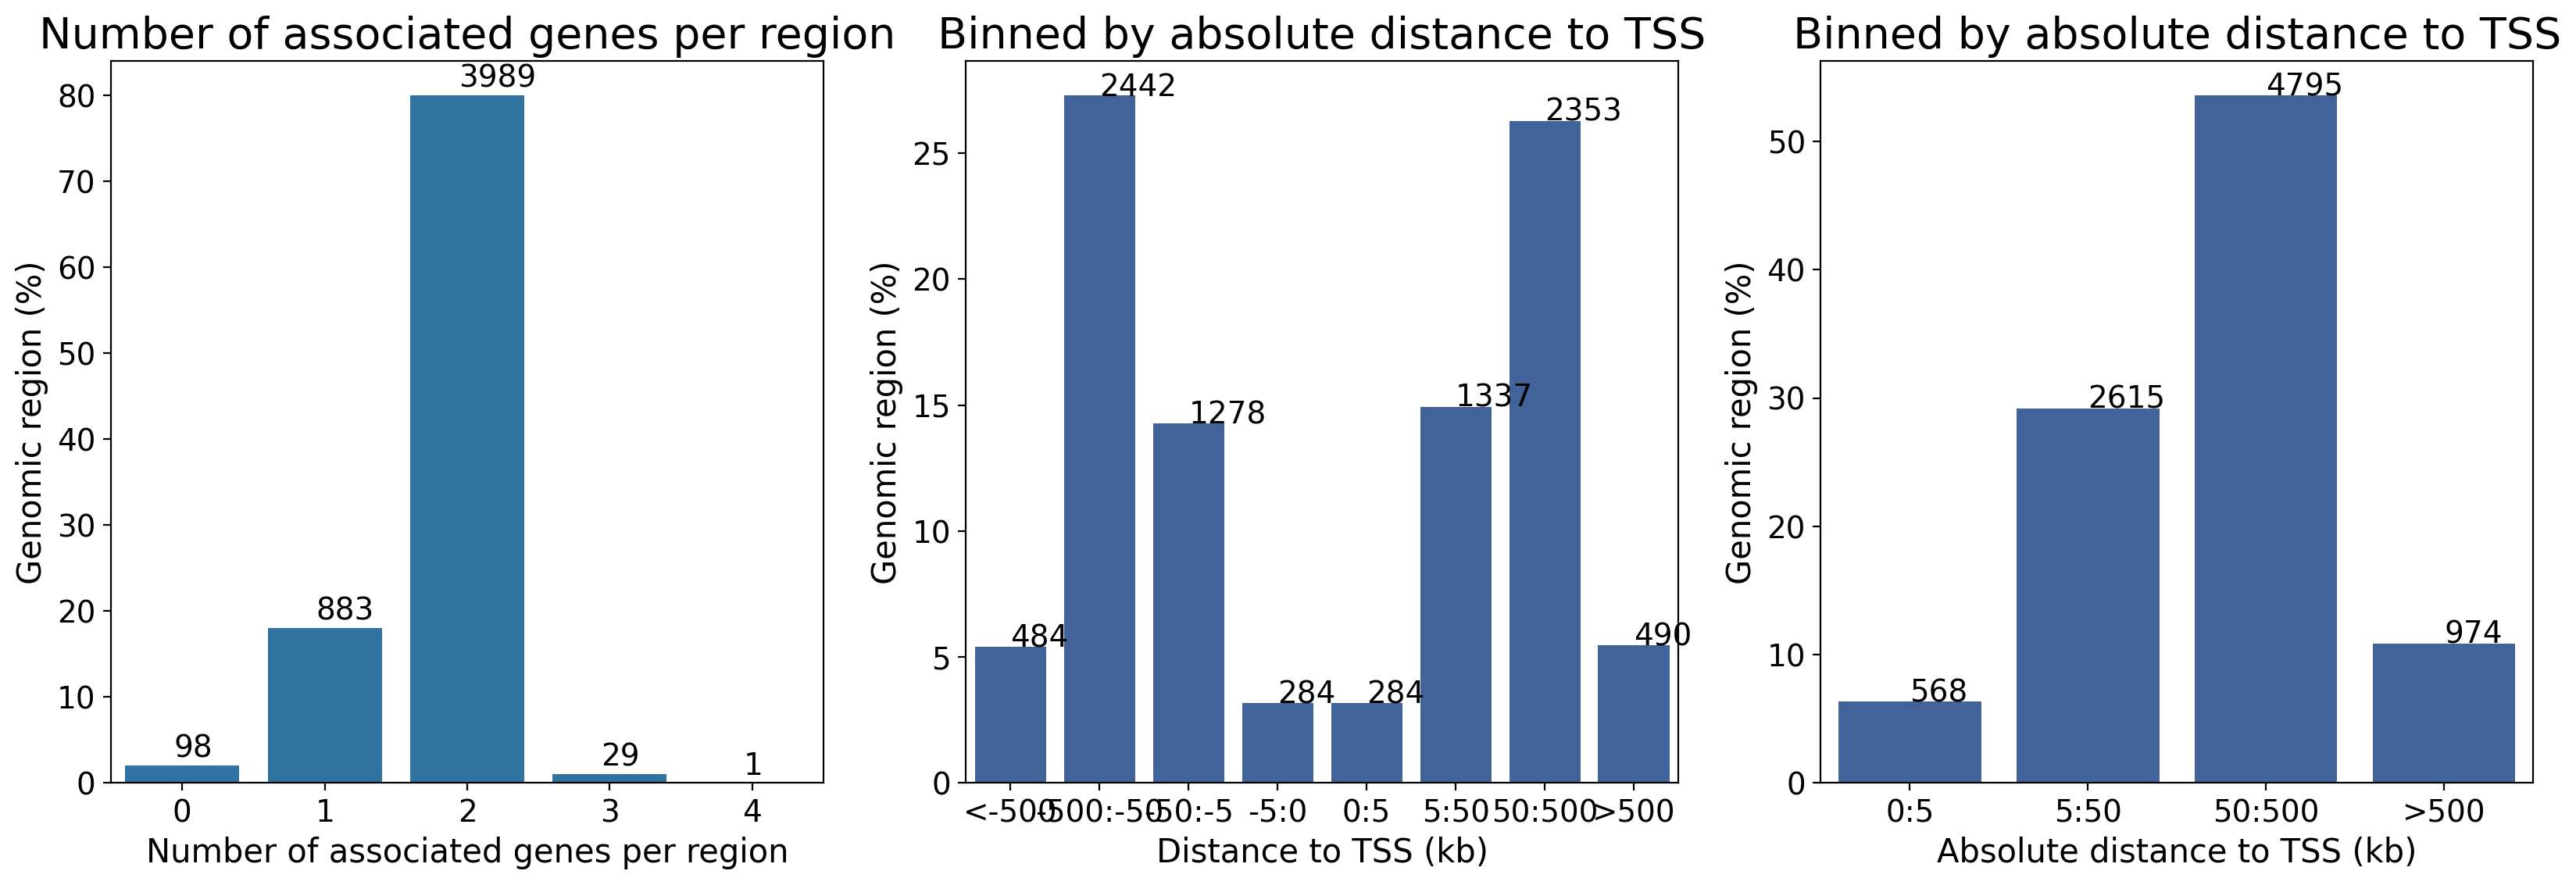

In [7]:
fig,ax = plt.subplots(1,3,figsize = (20,6),dpi=200)
great.pl.graph_nb_asso_per_peaks(guide_test,regdom,ax[0])
great.pl.graph_dist_tss(guide_test,regdom,ax[1])
great.pl.graph_absolute_dist_tss(guide_test,regdom,ax[2])
plt.show()

In [13]:
enrichment_guide_diabetes_15 = great.tl.enrichment(
    './guide_beds/PC15.bed',
    "./regdom_generated.bed",
    "./chr_size.bed", 
    "./ontologies.csv",
    binom = True,
    hypergeom = False
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5191/5191 [30:32<00:00,  2.83it/s]


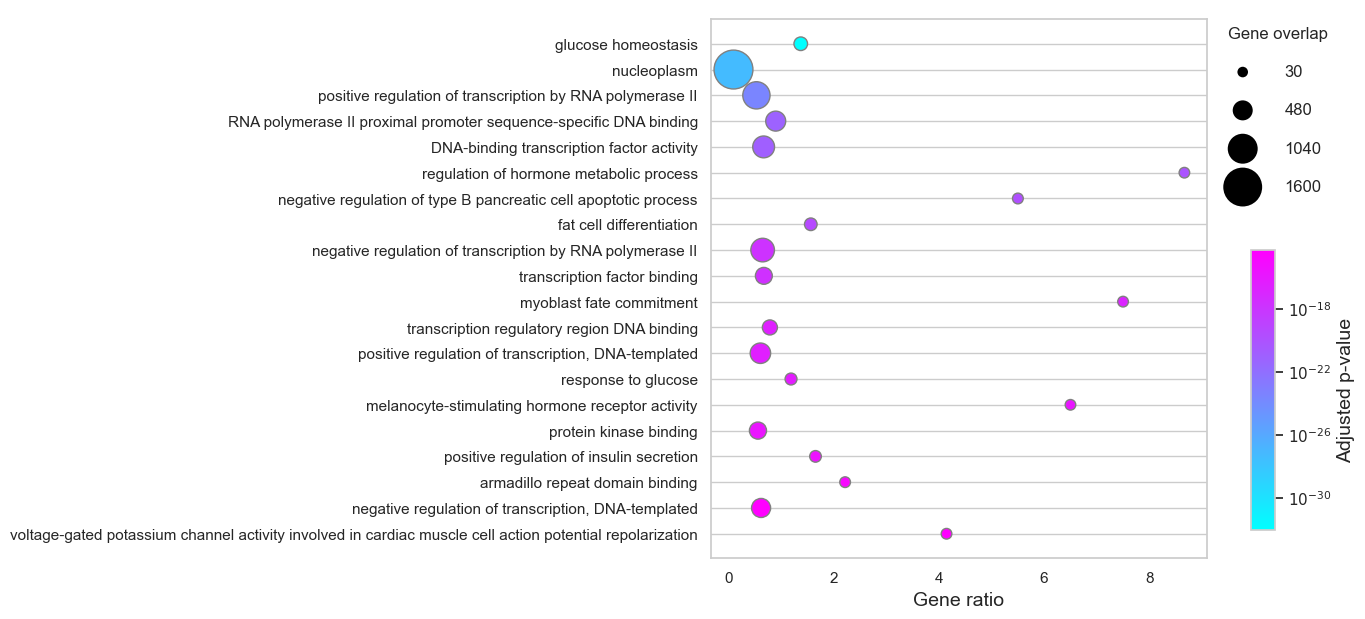

In [16]:
plot = enrichment_guide_diabetes_15.rename(columns = {"binom_p_value" : "p_value", "go_term":"name"})
plt.figure(figsize = (8,7))
great.pl.plot_enrich(plot)

# gene ratio = significant genes / total genes in pathway

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4995/4995 [30:28<00:00,  2.73it/s]


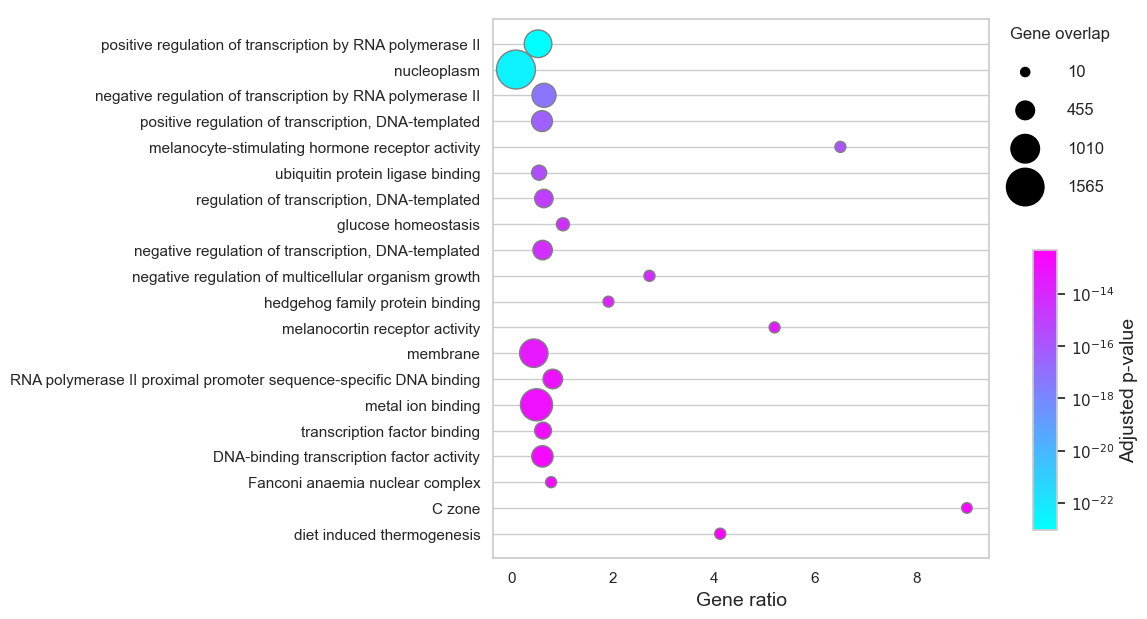

In [17]:
enrichment_guide_fat_23 = great.tl.enrichment(
    './guide_beds/PC23.bed',
    "./regdom_generated.bed",
    "./chr_size.bed", 
    "./ontologies.csv",
    binom = True,
    hypergeom = False
)
plot = enrichment_guide_fat_23.rename(columns = {"binom_p_value" : "p_value", "go_term":"name"})
plt.figure(figsize = (8,7))
great.pl.plot_enrich(plot)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5218/5218 [31:41<00:00,  2.74it/s]


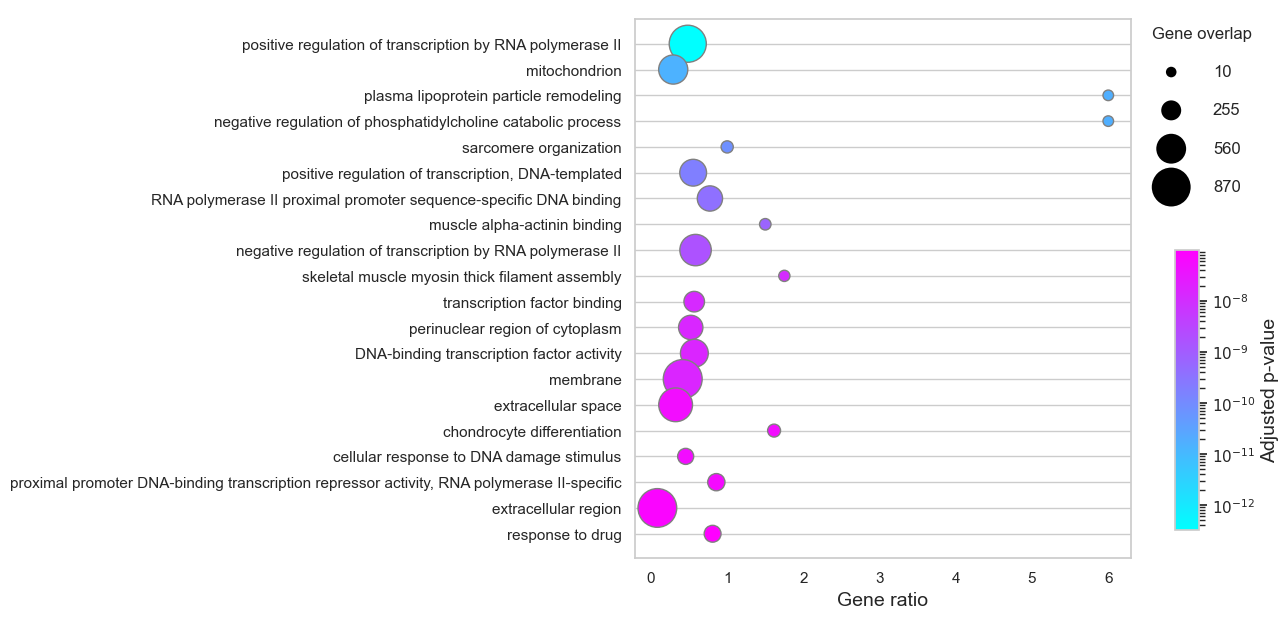

In [18]:
enrichment_guide_fat_1 = great.tl.enrichment(
    './guide_beds/PC1.bed',
    "./regdom_generated.bed",
    "./chr_size.bed", 
    "./ontologies.csv",
    binom = True,
    hypergeom = False
)
plot = enrichment_guide_fat_1.rename(columns = {"binom_p_value" : "p_value", "go_term":"name"})
plt.figure(figsize = (8,7))
great.pl.plot_enrich(plot)

In [474]:
enrichment_guide_alz

,go_term,binom_p_value,binom_fold_enrichment,intersection_size,recall
GO:0050196,[phosphorylase] phosphatase activity,1.33009e-39,1.83395e+05,33,1.65000e+01
GO:0005981,regulation of glycogen catabolic process,3.22361e-39,1.78410e+05,33,1.10000e+01
GO:1904743,negative regulation of telomeric DNA binding,5.14953e-36,1.22878e+05,35,1.75000e+01
GO:0042587,glycogen granule,1.56877e-35,1.27275e+05,34,5.66667e+00
GO:0070198,"protein localization to chromosome, telomeric ...",3.27743e-35,5.21720e+04,53,3.11765e+00
...,...,...,...,...,...
GO:1904659,glucose transmembrane transport,9.99551e-01,6.49189e+02,1,3.44828e-02
GO:0097449,astrocyte projection,9.99592e-01,6.41090e+02,1,1.25000e-01
GO:0006027,glycosaminoglycan catabolic process,9.99921e-01,1.38449e+03,5,1.78571e-01
GO:0006334,nucleosome assembly,9.99984e-01,1.80608e+03,11,9.64912e-02


In [5]:
enrichment_guide_alz_72 = great.tl.enrichment(
    "./guide_beds/PC72.bed",
    "./regdom_generated.bed",
    "./chr_size.bed", 
    "./ontologies.csv",
    binom = True,
    hypergeom = False
)

5377


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5377/5377 [41:26<00:00,  2.16it/s]


In [6]:
enrichment_deg_alz_71 = great.tl.enrichment(
    "./degas_beds/PC71.bed",
    "./regdom_generated.bed",
    "./chr_size.bed", 
    "./ontologies.csv",
    binom = True,
    hypergeom = False
)

5294


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5294/5294 [39:18<00:00,  2.24it/s]


In [83]:
#enrichment_deg_alz_71.to_csv('degas_71_greatpy.csv', sep='\t')
#enrichment_guide_alz_72.to_csv('guide_72_greatpy.csv', sep='\t')

enrichment_deg_alz_71.head(100)
#enrichment_guide_alz_72.head(100)


,go_term,binom_p_value,binom_fold_enrichment,intersection_size,recall
GO:0005742,mitochondrial outer membrane translocase complex,1.21361e-27,7.67562e+04,33,1.73684e+00
GO:0015288,porin activity,1.25858e-27,1.07987e+05,28,4.66667e+00
GO:0010900,negative regulation of phosphatidylcholine cat...,1.27047e-27,1.33785e+06,13,1.30000e+01
GO:0034369,plasma lipoprotein particle remodeling,1.27047e-27,1.33785e+06,13,1.30000e+01
GO:0060228,phosphatidylcholine-sterol O-acyltransferase a...,1.20498e-26,1.77887e+05,22,2.44444e+00
...,...,...,...,...,...
GO:0010875,positive regulation of cholesterol efflux,4.83318e-08,2.16421e+04,21,1.10526e+00
GO:0043085,positive regulation of catalytic activity,4.90010e-08,1.09215e+04,60,7.50000e-01
GO:0042982,amyloid precursor protein metabolic process,5.10402e-08,3.67664e+04,13,8.66667e-01
GO:0097402,neuroblast migration,5.30935e-08,3.66392e+04,13,6.50000e+00


57
['GUIDE', 'TSVD', 'idk but it doenst work unless something is here']


<Figure size 640x480 with 0 Axes>

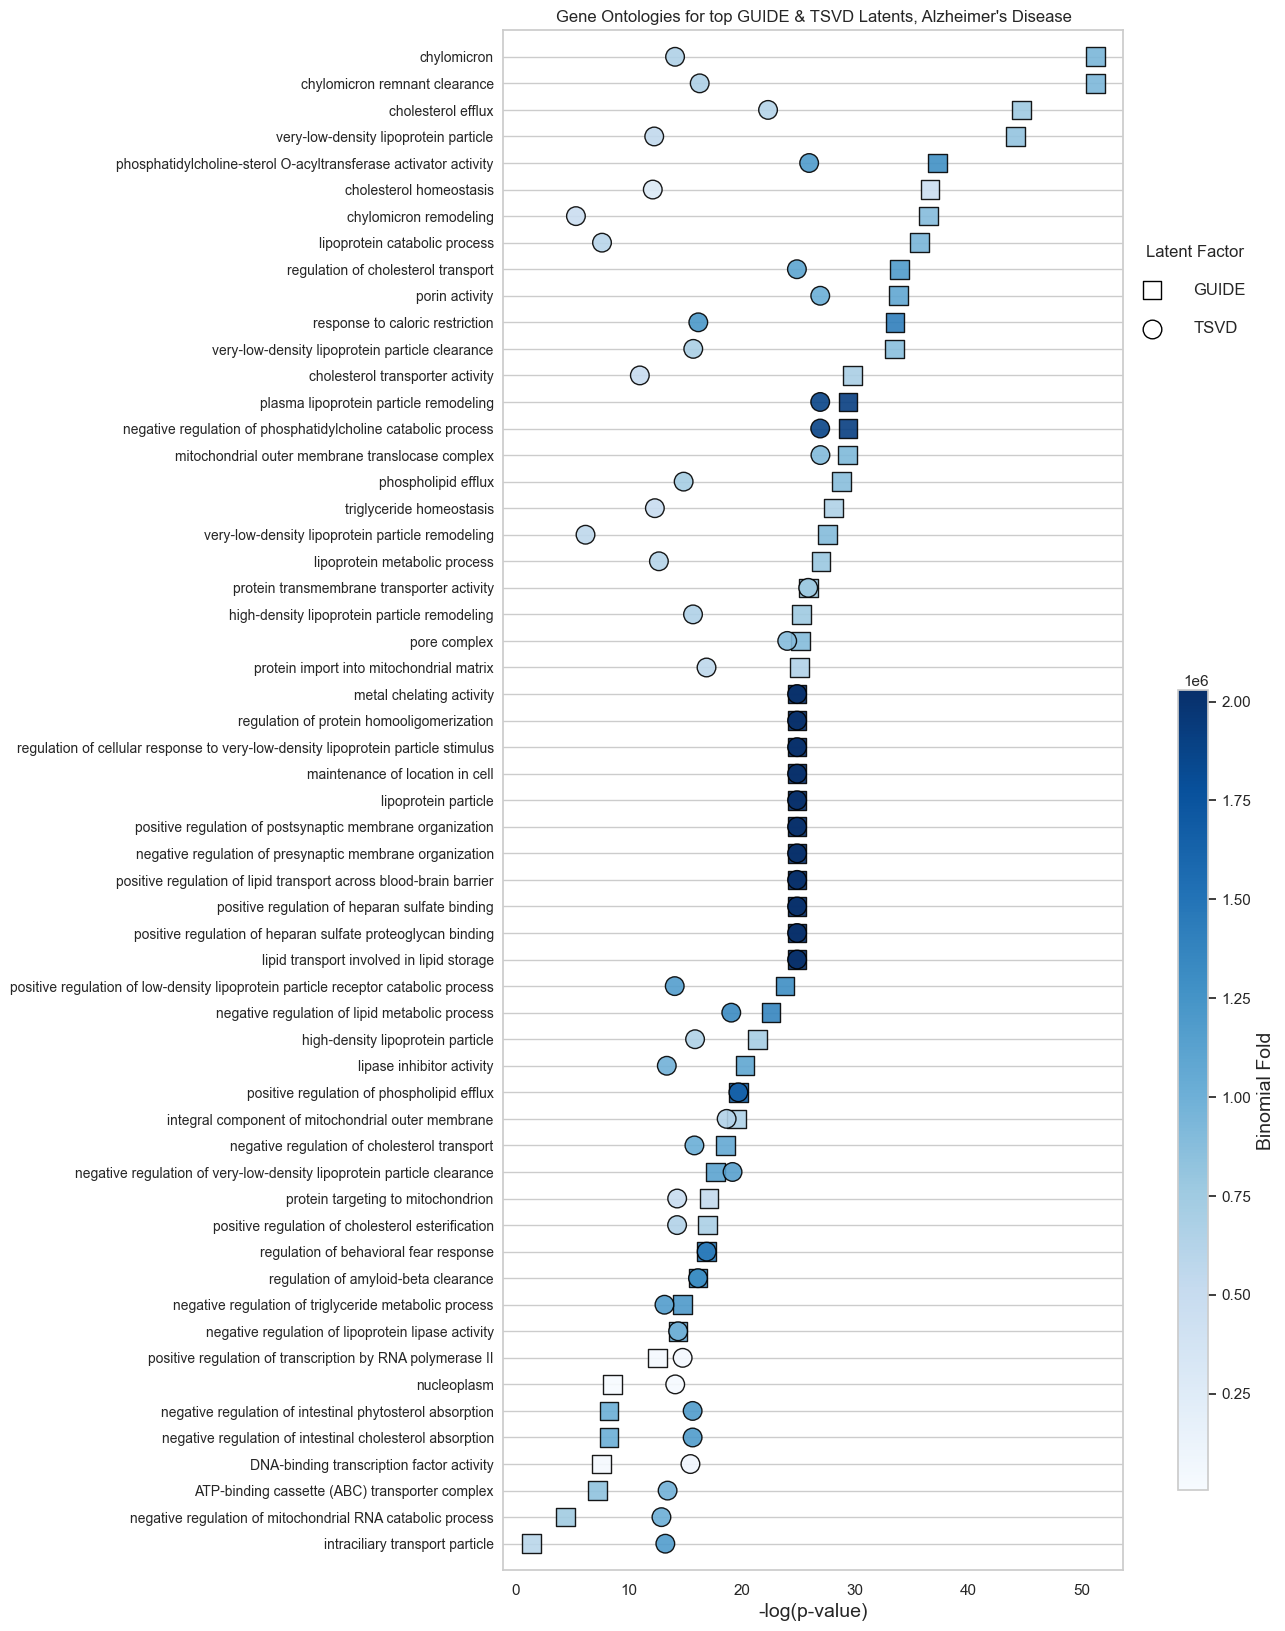

In [101]:
guide_genes = set(enrichment_guide_alz_72.head(20).index) #- set(['GO:0030834', 'GO:0040011', 'GO:0042247', 'GO:0042643'])
degas_genes = list(enrichment_deg_alz_71.head(100).index)
guide_genes = guide_genes.union(set(degas_genes[:50]))
print(len(guide_genes))

to_plot_guide = enrichment_guide_alz_72.loc[list(sorted(guide_genes))].rename(columns = {"binom_p_value" : "p_value", "go_term":"name"}).sort_values('p_value', ascending=False)
to_plot_degas = enrichment_deg_alz_71.loc[list(sorted(guide_genes))].rename(columns = {"binom_p_value" : "p_value", "go_term":"name"})#.sort_values('p_value', ascending=False)
merged = to_plot_guide.merge(to_plot_degas, left_on='name', right_on='name')

merged['diff'] = merged['p_value_x'] - merged['p_value_y']
merged = merged.sort_values('p_value_x', ascending=False)
merged['inds'] = merged.index

plt.clf()
plot_enrich_combined(merged, merged, color='Blues', label='alz', phe="Alzheimer's Disease")


In [682]:
guide_genes = set(enrichment.head(20).index)
degas_genes = set()

together = degas_genes.union(guide_genes)
print(len(together))


20


In [651]:
to_plot_guide = enrichment.loc[list(sorted(together))].rename(columns = {"binom_p_value" : "p_value", "go_term":"name"}).sort_values('p_value', ascending=False)
to_plot_degas = enrichment_deg.loc[list(sorted(together))].rename(columns = {"binom_p_value" : "p_value", "go_term":"name"}).sort_values('p_value', ascending=False)

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, rc, rcParams
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns

def scale_data_5_75(data, mind, maxd):
    if maxd == mind:
        maxd = maxd + 1
        mind = mind - 1

    drange = maxd - mind
    return (((data - mind) / drange * 0.70) + 0.05) * 100


def plot_enrich_combined(data1: pd.DataFrame, data2: pd.DataFrame, 
                         replaced_folds1: list = [], replaced_folds2: list = [],
                         color: str = "cool", label: str = None, phe: str = None):

    data_to_plot1 = data1.iloc[:, :].copy()
    data_to_plot2 = data2.iloc[:, :].copy()

    data_to_plot1["go.id"] = data_to_plot1.index
    data_to_plot2["go.id"] = data_to_plot2.index


    min_pval1 = data_to_plot1["binom_fold_enrichment_x"].min()
    max_pval1 = data_to_plot1["binom_fold_enrichment_x"].max()
    
    min_pval2 = data_to_plot2["binom_fold_enrichment_y"].min()
    max_pval2 = data_to_plot2["binom_fold_enrichment_y"].max()
    
    min_pval = min(min_pval1, min_pval2)
    max_pval = max(max_pval1, max_pval2)

    norm = colors.Normalize(min_pval, max_pval)
    sm = plt.cm.ScalarMappable(cmap=color, norm=norm)
    sm.set_array([])

    rcParams.update({"font.size": 14, "font.weight": "normal"})

    sns.set(style="whitegrid")
    
    fig = plt.figure(figsize=(10,20))
    #plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)

    ax1.tick_params(axis='y', which='major', pad=1)
    ax1.tick_params(axis='y', which='major', labelsize=10)

    circle_size = 180
    
    data_to_plot1.p_value_x = data_to_plot1.p_value_x.apply(lambda x: -np.log10(x))
    data_to_plot2.p_value_y = data_to_plot2.p_value_y.apply(lambda x: -np.log10(x))

    
    ax1.scatter(
        x="p_value_x",
        y="name",
        c="binom_fold_enrichment_x",
        cmap=color,
        norm=colors.LogNorm(min_pval, max_pval),
        data=data_to_plot1,
        linewidth=1.,
        marker='s',
        edgecolor="black",
        #s=[(i + 10) ** 1.5 for i in data_to_plot1["scaled.overlap"]],
        s = [circle_size for _ in range(len(data_to_plot1.p_value_x))],
        label='guide',
        alpha=0.9
    )
    #plt.show()

    ax1.scatter(
        x="p_value_y",
        y="name",
        c="binom_fold_enrichment_y",
        cmap=color,
        norm=colors.LogNorm(min_pval, max_pval),
        data=data_to_plot2,
        linewidth=1,
        edgecolor="black",
        #s=[(i + 10) ** 1.5 for i in data_to_plot2["scaled.overlap"]],
        s = [circle_size for _ in range(len(data_to_plot1.p_value_x))],
        label='degas',
        alpha=0.9
    )
    
    plt.ylim(-1, len(list(data_to_plot1['name'])))

    
    #plt.show()

    ax = plt.gca()
    #ax.invert_xaxis()

    ax.set_ylabel("")
    ax.set_xlabel("-log(p-value)", fontsize=14, fontweight="normal")
    ax.xaxis.grid(False)
    ax.set_xscale('linear')
    ax.yaxis.grid(True)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Get tick marks for this plot
    # Note: 6 ticks maximum
    min_tick = np.floor(min_pval).astype(int)
    max_tick = np.ceil(max_pval).astype(int)
    tick_step = np.ceil((max_tick - min_tick) / 6).astype(int)
    
    if tick_step == 0:
        tick_step = 1
        min_tick = max_tick - 1
    plt.title(f"Gene Ontologies for top GUIDE & TSVD Latents, {phe}")

    # Colorbar
    fig = plt.gcf()
    cbaxes = fig.add_axes([0.8, 0.15, 0.03, 0.4])
    cbar = ax.figure.colorbar(sm, shrink=0.5, anchor=(0, 0.1), cax=cbaxes)
    #cbar.ax.set_yticklabels(ticks_labs)
    cbar.set_label("Binomial Fold", fontsize=14, fontweight="normal")
    
    l1 = plt.scatter([], [], s=circle_size, edgecolors="black", marker='s', color="white", linewidth=1.)
    l2 = plt.scatter([], [], s=circle_size, edgecolors="black", color="white")
    #l3 = plt.scatter([], [], s=(size_leg_scaled_vals[2] + 10) ** 1.5, edgecolors="none", color="black")

    labels = ['GUIDE', 'TSVD', 'idk but it doenst work unless something is here']
    print(labels)

    leg = plt.legend(
        [l1, l2],
        labels[:-1],
        ncol=1,
        frameon=False,
        fontsize=12,
        handlelength=1,
        loc="center left",
        borderpad=1,
        labelspacing=1.4,
        handletextpad=2,
        title="Latent Factor",
        scatterpoints=1,
        bbox_to_anchor=(-2, 1.5),
        facecolor="black",
    )

    if label:
        #print('lmfao')
        plt.savefig(f"./{label}_dotplot_save.png", dpi=200, bbox_inches='tight')

    plt.show()

In [270]:
guide_test = "./guide_beds/PC90.bed"
regdom = "./regulatory_domain_hg19.bed"
plt.clf()

# compute the enrichment
enrichment_guide = great.tl.enrichment(
    guide_test,
    "./regdom_generated.bed",
    "./chr_size.bed", 
    "./ontologies.csv",
    binom = True,
    hypergeom = False
)

5011
0 5011
1 5011
2 5011
3 5011
4 5011
5 5011
6 5011
7 5011
8 5011
9 5011
10 5011
11 5011
12 5011
13 5011
14 5011
15 5011
16 5011
17 5011
18 5011
19 5011
20 5011
21 5011
22 5011
23 5011
24 5011
25 5011
26 5011
27 5011
28 5011
29 5011
30 5011
31 5011
32 5011
33 5011
34 5011
35 5011
36 5011
37 5011
38 5011
39 5011
40 5011
41 5011
42 5011
43 5011
44 5011
45 5011
46 5011
47 5011
48 5011
49 5011
50 5011
51 5011
52 5011
53 5011
54 5011
55 5011
56 5011
57 5011
58 5011
59 5011
60 5011
61 5011
62 5011
63 5011
64 5011
65 5011
66 5011
67 5011
68 5011
69 5011
70 5011
71 5011
72 5011
73 5011
74 5011
75 5011
76 5011
77 5011
78 5011
79 5011
80 5011
81 5011
82 5011
83 5011
84 5011
85 5011
86 5011
87 5011
88 5011
89 5011
90 5011
91 5011
92 5011
93 5011
94 5011
95 5011
96 5011
97 5011
98 5011
99 5011


<Figure size 640x480 with 0 Axes>

In [274]:
enrichment_deg = great.tl.enrichment(
    "./degas_beds/PC30.bed",
    "./regdom_generated.bed",
    "./chr_size.bed", 
    "./ontologies.csv",
    binom = True,
    hypergeom = False
)


5115
0 5115
1 5115
2 5115
3 5115
4 5115
5 5115
6 5115
7 5115
8 5115
9 5115
10 5115
11 5115
12 5115
13 5115
14 5115
15 5115
16 5115
17 5115
18 5115
19 5115
20 5115
21 5115
22 5115
23 5115
24 5115
25 5115
26 5115
27 5115
28 5115
29 5115
30 5115
31 5115
32 5115
33 5115
34 5115
35 5115
36 5115
37 5115
38 5115
39 5115
40 5115
41 5115
42 5115
43 5115
44 5115
45 5115
46 5115
47 5115
48 5115
49 5115
50 5115
51 5115
52 5115
53 5115
54 5115
55 5115
56 5115
57 5115
58 5115
59 5115
60 5115
61 5115
62 5115
63 5115
64 5115
65 5115
66 5115
67 5115
68 5115
69 5115
70 5115
71 5115
72 5115
73 5115
74 5115
75 5115
76 5115
77 5115
78 5115
79 5115
80 5115
81 5115
82 5115
83 5115
84 5115
85 5115
86 5115
87 5115
88 5115
89 5115
90 5115
91 5115
92 5115
93 5115
94 5115
95 5115
96 5115
97 5115
98 5115
99 5115


20


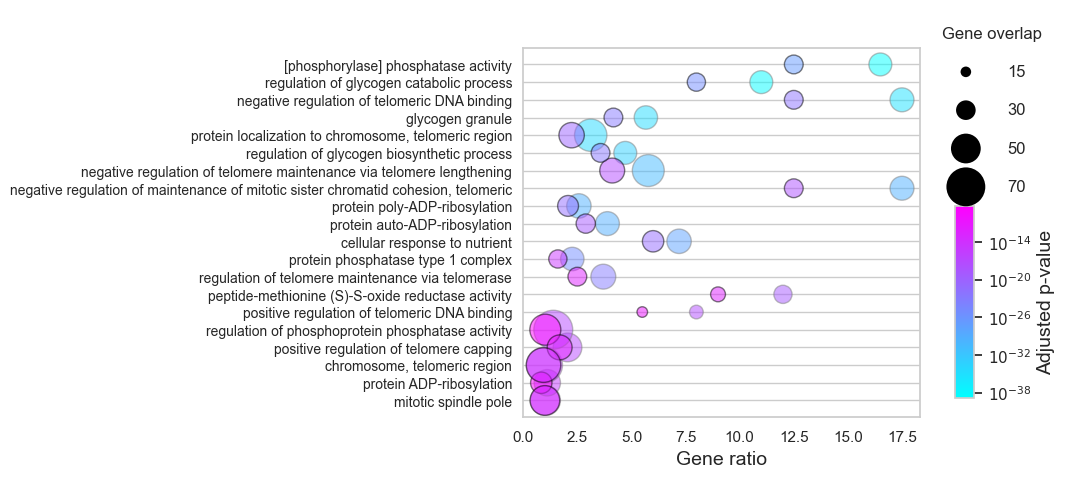

In [277]:
guide_genes = set(enrichment_guide.head(20).index)
degas_genes = set()
together = degas_genes.union(guide_genes)
print(len(together))

to_plot_guide = enrichment_guide.loc[list(sorted(together))].rename(columns = {"binom_p_value" : "p_value", "go_term":"name"}).sort_values('p_value', ascending=False)
to_plot_degas = enrichment_deg.loc[list(sorted(together))].rename(columns = {"binom_p_value" : "p_value", "go_term":"name"}).sort_values('p_value', ascending=False)

plot_enrich_combined(to_plot_guide, to_plot_degas)

In [ ]:
def scale_data_5_75(data, mind, maxd):
    if maxd == mind:
        maxd = maxd + 1
        mind = mind - 1

    drange = maxd - mind
    return (((data - mind) / drange * 0.70) + 0.05) * 100


def plot_enrich_combined(data1: pd.DataFrame, data2: pd.DataFrame, color: str = "cool", label: str = None):
    # Test data input
    if not isinstance(data1, pd.DataFrame):
        raise ValueError("Please input a Pandas Dataframe output by gprofiler.")

    if not np.all([term in data1.columns for term in ["p_value", "name", "intersection_size"]]):
        raise TypeError(f"The data frame {data1} does not contain enrichment results from gprofiler.")

    data_to_plot1 = data1.iloc[:, :].copy()
    data_to_plot2 = data2.iloc[:, :].copy()

    data_to_plot1["go.id"] = data_to_plot1.index
    data_to_plot2["go.id"] = data_to_plot2.index


    min_pval1 = data_to_plot1["binom_fold_enrichment"].min()
    max_pval1 = data_to_plot1["binom_fold_enrichment"].max()
    
    min_pval2 = data_to_plot2["binom_fold_enrichment"].min()
    max_pval2 = data_to_plot2["binom_fold_enrichment"].max()
    
    min_pval = min(min_pval1, min_pval2)
    max_pval = max(max_pval1, max_pval2)


    # Scale intersection_size to be between 5 and 75 for plotting
    # Note: this is done as calibration was done for values between 5 and 75
    #print(np.max(data_to_plot1["intersection_size"]))
    #print(np.max(data_to_plot2["intersection_size"]))

    mind = min(np.min(data_to_plot1["intersection_size"]), np.min(data_to_plot2["intersection_size"]))
    maxd = max(np.max(data_to_plot1["intersection_size"]), np.max(data_to_plot2["intersection_size"]))
    data_to_plot1["scaled.overlap"] = scale_data_5_75(data_to_plot1["intersection_size"], mind, maxd)
    data_to_plot2["scaled.overlap"] = scale_data_5_75(data_to_plot2["intersection_size"], mind, maxd)


    norm = colors.LogNorm(min_pval, max_pval)
    sm = #plt.cm.ScalarMappable(cmap=color, norm=norm)
    sm.set_array([])

    rcParams.update({"font.size": 14, "font.weight": "normal"})

    sns.set(style="whitegrid")
    
    fig = plt.figure(figsize=(10,6))
    #plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)

    ax1.tick_params(axis='y', which='major', pad=2)
    ax1.tick_params(axis='y', which='major', labelsize=10)



    ax1.scatter(
        x="p_value",
        y="name",
        c="binom_fold_enrichment",
        cmap=color,
        norm=colors.LogNorm(min_pval, max_pval),
        data=data_to_plot1,
        linewidth=2,
        edgecolor="black",
        s=[(i + 10) ** 1.5 for i in data_to_plot1["scaled.overlap"]],
        label='guide',
        alpha=0.5
    )
    #plt.show()

    ax1.scatter(
        x="p_value",
        y="name",
        c="binom_fold_enrichment",
        cmap=color,
        norm=colors.LogNorm(min_pval, max_pval),
        data=data_to_plot2,
        linewidth=1,
        edgecolor="grey",
        s=[(i + 10) ** 1.5 for i in data_to_plot2["scaled.overlap"]],
        label='degas',
        alpha=0.5
    )
    
    #plt.show()

    ax = plt.gca()
    ax.invert_xaxis()

    ax.set_ylabel("")
    ax.set_xlabel("-log(p-value)", fontsize=14, fontweight="normal")
    ax.xaxis.grid(False)
    ax.set_xscale('log')
    ax.yaxis.grid(True)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Get tick marks for this plot
    # Note: 6 ticks maximum
    min_tick = np.floor(np.log10(min_pval)).astype(int)
    max_tick = np.ceil(np.log10(max_pval)).astype(int)
    tick_step = np.ceil((max_tick - min_tick) / 6).astype(int)

    # Ensure no 0 values
    if tick_step == 0:
        tick_step = 1
        min_tick = max_tick - 1

    ticks_vals = [10**i for i in range(max_tick, min_tick - 1, -tick_step)]
    ticks_labs = ["$10^{" + str(i) + "}$" for i in range(max_tick, min_tick - 1, -tick_step)]

    # Colorbar
    fig = plt.gcf()
    cbaxes = fig.add_axes([0.8, 0.15, 0.03, 0.4])
    cbar = ax.figure.colorbar(sm, ticks=ticks_vals, shrink=0.5, anchor=(0, 0.1), cax=cbaxes)
    cbar.ax.set_yticklabels(ticks_labs)
    cbar.set_label("Binomial Fold", fontsize=14, fontweight="normal")

    # Size legend
    min_olap = min(data_to_plot1["intersection_size"].min(), data_to_plot2["intersection_size"].min())
    max_olap = max(data_to_plot1["intersection_size"].max(), data_to_plot2["intersection_size"].max())

    olap_range = max_olap - min_olap

    # Note: approximate scaled 5, 25, 50, 75 values are calculated
    #      and then rounded to nearest number divisible by 5
    size_leg_vals = [
        np.ceil(i / 5) * 5
        for i in [min_olap, min_olap + (20 / 70) * olap_range, min_olap + (45 / 70) * olap_range, max_olap]
    ]
    size_leg_scaled_vals = scale_data_5_75(size_leg_vals, np.min(size_leg_vals), np.max(size_leg_vals))

    l1 = plt.scatter([], [], s=(size_leg_scaled_vals[0] + 10) ** 1.5, edgecolors="none", color="black")
    l2 = plt.scatter([], [], s=(size_leg_scaled_vals[1] + 10) ** 1.5, edgecolors="none", color="black")
    l3 = plt.scatter([], [], s=(size_leg_scaled_vals[2] + 10) ** 1.5, edgecolors="none", color="black")
    l4 = plt.scatter([], [], s=(size_leg_scaled_vals[3] + 10) ** 1.5, edgecolors="none", color="black")

    labels = [str(int(i)) for i in size_leg_vals]

    leg = plt.legend(
        [l1, l2, l3, l4],
        labels,
        ncol=1,
        frameon=False,
        fontsize=12,
        handlelength=1,
        loc="center left",
        borderpad=1,
        labelspacing=1.4,
        handletextpad=2,
        title="Gene overlap",
        scatterpoints=1,
        bbox_to_anchor=(-2, 1.5),
        facecolor="black",
    )

    if label:
        plt.savefig(f"{label}_dotplot_save.png", dpi=200)
    

    plt.show()